What makes a good loss function for generative modes? What criteria are we trying to optimise?

# Scoring functions

* So what are these? 
* What do the look like (geometric info theory?).
* What are they doing to the inputs?
* How can we interpret them?

https://gist.github.com/fhuszar/a91c7d0672036335c1783d02c3a3dfe5

In [91]:
ML(X) = -log(X)
CE(X,Y) = -X.*log(Y)
KL(X,Y) = -X.*log(X./Y)
function JS(X,Y,p=0.5)
    Z = p.*X + (1-p).*Y
    return (1-p).*KL(X,Z) + p.*KL(Y,Z)
end
MSE(X,Y) = sum((X-Y).^2)

MMD (generic function with 1 method)

# Maximum mean discrepancy

* this is an expensive loss function to evaluate?!? what is the compelxity of its gradient?
* I am confused. When two vectors, x_i,x_j are very disimmilar the kernel will return a small/infentismal result. Therefore we will get little to no contribution to the loss.

In [96]:
kernel(X,Y) = exp((-norm(X-Y).^2)./(2*3))

function MMD(X,Y)
    N = size(X)[1]
    Loss = 0
    for i in 1:N
        for j in 1:N
            Loss += kernel(X[i,:],X[j,:]) -2*kernel(X[i,:],Y[j,:]) + kernel(Y[i,:],Y[j,:])
        end
    end
    return Loss/(N*N)
end;

In [87]:
using MNIST
data,labels = traindata()
data = transpose(data)./255
X = data[1:1000,:]
X = (X - mean(X))/var(X);

In [94]:
kernel(X,randn((1000,784)))

0.0

In [90]:
MMD(randn((1000,784)),X)

0.002

In [106]:
using PyPlot
xkcd()
#what is the best way to compare these?
#use a real numbers and compare?
#use whole distributions?
T = 1000
P = ones((T,1))*0.2
Q = exp(-linspace(-1,1,T).^2);

In [46]:
plot(Q,MMN(Q,P))

LoadError: LoadError: MethodError: `kernel` has no method matching kernel(::LinSpace{Float64}, ::LinSpace{Float64})
Closest candidates are:
  kernel(::Any)
while loading In[46], in expression starting on line 1

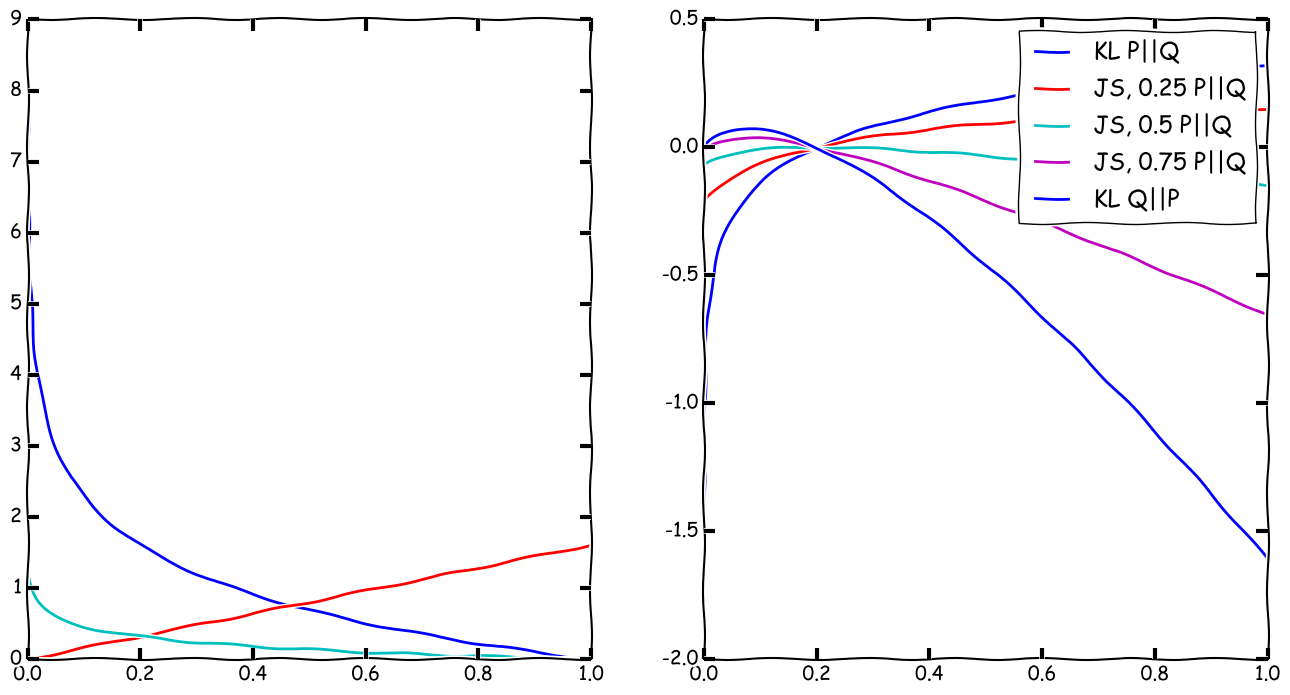

PyObject <matplotlib.legend.Legend object at 0x3179cef98>

In [121]:
Q = linspace(0.0002,0.9998,T)
P = ones((T,1))*0.2

figure(figsize=(16,8))
subplot(1,2,1)
plot(Q,ML(Q),label = "")
plot(Q,CE(Q,P))
plot(Q,CE(P,Q))
subplot(1,2,2)
plot(Q,KL(P,Q),label = "KL P||Q") # a nice 3 d plot of this? for different P distributions??
plot(Q,JS(P,Q,0.25),label = "JS, 0.25 P||Q")
plot(Q,JS(P,Q,0.5),label = "JS, 0.5 P||Q")
plot(Q,JS(P,Q,0.75),label = "JS, 0.75 P||Q")
plot(Q,KL(Q,P),label = "KL Q||P")
legend()

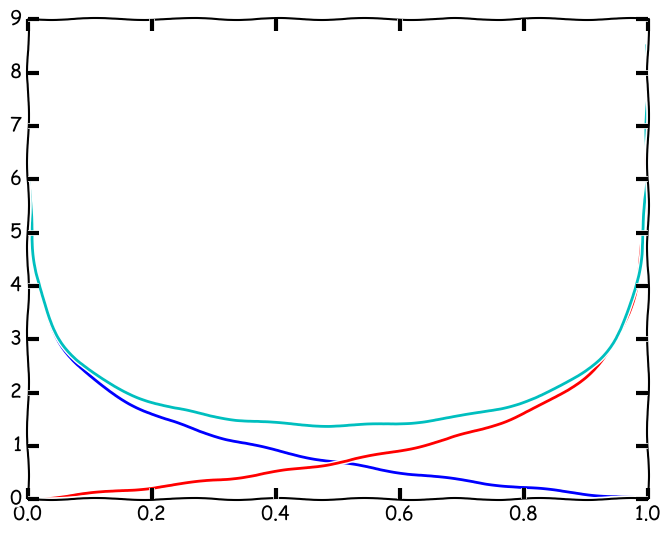

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a7acd30>

In [120]:
GAN(X) = -log(X) - log(1-X)
plot(Q,-log(Q))
plot(Q,-log(1-Q))
plot(Q,GAN(Q))